# P3: Il migliore di tutti

#### Soluzione proposta da Lucia Galati

In [16]:
import pandas as pd #libreria software utile per la manipolazione e l'analisi dei dati
df = pd.read_csv(r'C:\Users\Lucia\Desktop\data science\bgg.csv')
df

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.0
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.0
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.0
...,...,...,...
1082162,11906,Source of the Nile: Tributary,5.0
1082163,11906,Source of the Nile: Tributary,NaN
1082164,11906,Source of the Nile: Tributary,NaN
1082165,11906,Source of the Nile: Tributary,NaN


In [17]:
df.dropna(inplace=True) #ho eliminato le righe con valori NaN perché non sono utili
df

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.00
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.00
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.00
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.00
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.00
...,...,...,...
1082153,11906,Source of the Nile: Tributary,8.00
1082156,11906,Source of the Nile: Tributary,8.00
1082159,11906,Source of the Nile: Tributary,9.00
1082160,11906,Source of the Nile: Tributary,7.25


In [18]:
import numpy as np #libreria open source che offre gli strumenti per lavorare con grandi matrici e array multidimensionali
gb2=df.groupby(['game','title']).agg({'rating': ['mean', 'std', 'count'] })
#ho raggruppato sia tramite id che tramite titolo perché non è detto che il titolo sia univoco (mentre l'id lo è per certo)
#il raggruppamento è funzionale al calcolo della media, della deviazione standard e del numero di recensioni per ogni singolo gioco
gb2

rating                
                                   mean       std count
game   title                                           
1      Die Macher              7.645890  1.456946    73
2      Dragonmaster            6.619118  1.529536    68
3      Samurai                 7.630952  1.087716    84
4      Tal der Könige          6.558219  1.525547    73
5      Acquire                 7.584375  1.372759    80
...                                 ...       ...   ...
305682 Rolling Realms          7.301765  1.636177    34
306494 Rolling Village!        7.036842  1.970113    19
306577 Der Clou: Roll & Heist  8.714286  1.603567     7
308565 Roll n Cook             8.400000  1.454058    15
310100 Nemesis: Lockdown       8.000000  2.236068     7

[23810 rows x 3 columns]

In [19]:
gb2.reset_index(inplace=True)

In [20]:
gb2['title'].replace(['Busine$$ GO'], 'Business Go') #il titolo originale non viene letto da mathplotlib
#ho spostato la cella in alto per avere in output lo stesso titolo sia nelle tabelle che nei grafici

0                    Die Macher
1                  Dragonmaster
2                       Samurai
3                Tal der Könige
4                       Acquire
                  ...          
23805            Rolling Realms
23806          Rolling Village!
23807    Der Clou: Roll & Heist
23808               Roll n Cook
23809         Nemesis: Lockdown
Name: title, Length: 23810, dtype: object

In [21]:
import matplotlib.pyplot as plt #libreria per la creazione di grafici

### Prima correzione della media usando l'intervallo di confidenza

In [22]:
#alla media sottraggo l'intervallo di confidenza
gb2['score']= gb2[('rating',  'mean')]-1.96*gb2[('rating','std')]/gb2[('rating','count')].apply(lambda x: np.sqrt(x))
gb2.sort_values(by=['score', ('rating', 'count'), ('rating', 'mean')], inplace= True, ascending=[False, False, False])
#ordino lo score in modo decrescente
#a parità di score vince il gioco con il più alto numero di recensioni
#a parità di score e di numero di recensioni (count) vince il gioco con la media più alta
gb2

game                             title     rating                  \
                                                      mean       std count   
1114     1486                           Plunder  10.000000  0.000000     7   
12324   24824  Retinue: Medieval Skirmish Rules  10.000000  0.000000     4   
8684    13831        The Communication in Catan  10.000000  0.000000     3   
8752    13997                              Junk  10.000000  0.000000     2   
21709  228370                       TerroriXico   9.930233  0.457496    43   
...       ...                               ...        ...       ...   ...   
7684    11696                       Jassin 1915   1.000000       NaN     1   
8590    13579                               Öko   1.000000       NaN     1   
9044    14739                       FemWarriors   1.000000       NaN     1   
10285   18492            Black Magic Ritual Kit   1.000000       NaN     1   
11622   22301                           Beeline   1.000000       NaN     1   

           score  
                  
1114   10.000000  
12324  10.000000  
8684   10.000000  
8752   10.000000  
21709   9.793488  
...          ...  
7684         NaN  
8590         NaN  
9044         NaN  
10285        NaN  
11622        NaN  

[23810 rows x 6 columns]

In [23]:
gb2.dropna(inplace=True)

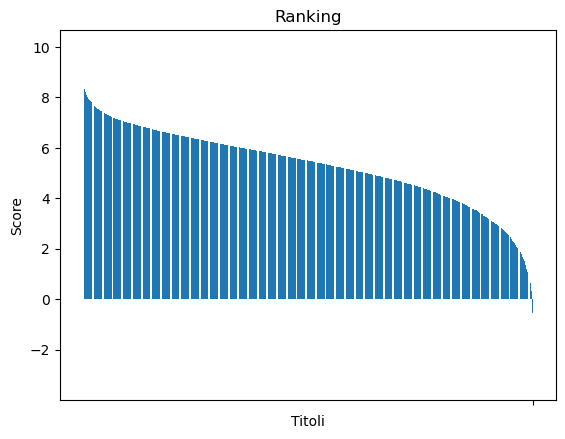

In [24]:
plt.bar(gb2['title'], gb2['score'])

plt.xticks(ticks='') #visto che i titoli sono troppi e si sovrapporrebbero è meglio non visualizzarli affatto

plt.xlabel('Titoli')
plt.ylabel('Score')
plt.title('Ranking')

plt.show()

### Operazione per dare ulteriore peso al numero di recensioni (classifica definitiva)

In [25]:
nmax = gb2[('rating', 'count')].max()
nmax

95

In [26]:
gb2['score corretto']= gb2['score']*gb2[('rating','count')]/nmax #voglio dare maggior peso al numero delle recensioni

In [27]:
gb2.sort_values(by=['score corretto', ('rating', 'count'), ('rating', 'mean')], inplace=True, ascending=[False, False, False])
gb2

game                                  title    rating            \
                                                          mean       std   
22401  245240                         Goblin Grapple  8.882955  1.302449   
23068  261393                    Dungeon Universalis  9.666329  0.568331   
23193  266192                               Wingspan  8.133407  1.503241   
15820   84876                The Castles of Burgundy  8.379070  1.318677   
19007  167791                      Terraforming Mars  8.468118  1.547108   
...       ...                                    ...       ...       ...   
23470  277565                         Ashes to Ashes  3.666667  4.618802   
10193   18152                     Deluxe Dirty Words  5.750000  6.010408   
11809   22985                            Gallop Home  5.750000  6.010408   
9406    15829  Backstreet Boys Around the World Game  4.000000  5.196152   
12981   27323                    Le Jeu de la Guerre  5.500000  6.363961   

                score score corretto  
      count                           
22401    88  8.610825       7.976343  
23068    79  9.541002       7.934097  
23193    91  7.824545       7.495090  
15820    86  8.100364       7.332961  
19007    85  8.139215       7.282456  
...     ...       ...            ...  
23470     3 -1.560000      -0.049263  
10193     2 -2.580000      -0.054316  
11809     2 -2.580000      -0.054316  
9406      3 -1.880000      -0.059368  
12981     2 -3.320000      -0.069895  

[23472 rows x 7 columns]

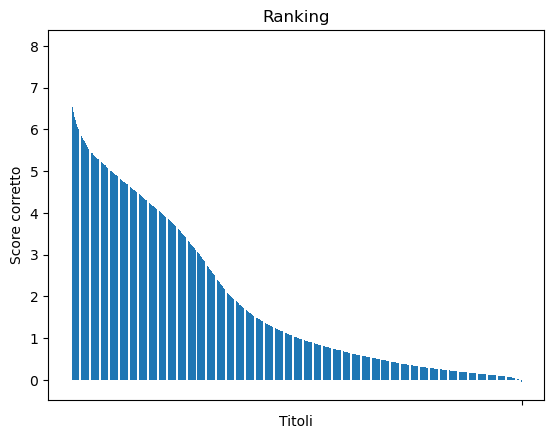

In [28]:
plt.bar(gb2['title'], gb2['score corretto'])

plt.xticks(ticks='')

plt.xlabel('Titoli')
plt.ylabel('Score corretto')
plt.title('Ranking')

plt.show()

### Confronto con il ranking che otterremmo attraverso la sola media voto di ogni gioco

In [29]:
gb2.sort_values(by=[('rating', 'mean'), ('rating', 'count')], inplace= True, ascending=[False, False])
gb2

game                                        title     rating  \
                                                                 mean   
1114     1486                                      Plunder  10.000000   
12324   24824             Retinue: Medieval Skirmish Rules  10.000000   
8684    13831                   The Communication in Catan  10.000000   
8752    13997                                         Junk  10.000000   
21709  228370                                  TerroriXico   9.930233   
...       ...                                          ...        ...   
7366    11102                                   Juden Raus   1.000000   
8951    14501  The Voyage of The First Fleeters: 1787-1788   1.000000   
9525    16236                               Tops and Tails   1.000000   
12737   26215                       Don't Point the Finger   1.000000   
13184   27992                                     Piratack   1.000000   

                           score score corretto  
            std count                            
1114   0.000000     7  10.000000       0.736842  
12324  0.000000     4  10.000000       0.421053  
8684   0.000000     3  10.000000       0.315789  
8752   0.000000     2  10.000000       0.210526  
21709  0.457496    43   9.793488       4.432842  
...         ...   ...        ...            ...  
7366   0.000000     2   1.000000       0.021053  
8951   0.000000     2   1.000000       0.021053  
9525   0.000000     2   1.000000       0.021053  
12737  0.000000     2   1.000000       0.021053  
13184  0.000000     2   1.000000       0.021053  

[23472 rows x 7 columns]

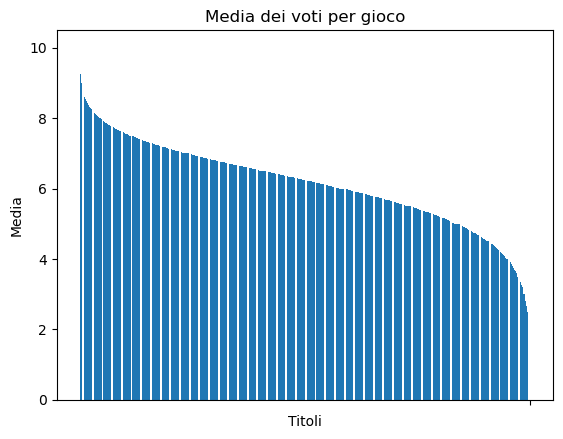

In [30]:
plt.bar(gb2['title'], gb2[('rating','mean')])

plt.xticks(ticks='')

plt.xlabel('Titoli')
plt.ylabel('Media')
plt.title('Media dei voti per gioco')

plt.show()